In [ ]:
https://drive.google.com/file/d/12hfRaNxp7ts_UGoOyzPCj3avUj3bJisf/view?usp=sharing

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r'/content/AirPassengers (1).csv')

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


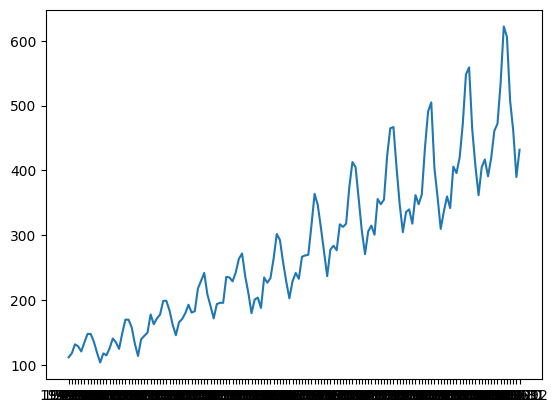

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Month'],df['#Passengers'])

In [ ]:
#ARIMA ( Auto Regressive integrated moving averages)
#p,d,q
# Auto Regressive(q)
# Moving average(p)


# 216->218

#adfuller()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df['Month'].max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
# 100-90=10

In [ ]:
dates=pd.date_range(start=df['Month'].min(),end=df['Month'].max(),freq='MS')#ME - month end, MS= month start
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
missing_dates=dates.difference(df['Month'])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [ ]:
# pd.DataFrame({'Month':missing_dates,'#Passengers':[np.NAN]*10})
#merged to orginal to df
#sort of dates
#df.fillna(method='ffill',inplace=True)

In [ ]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
df=df.set_index('Month')

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#resampling

#1980 to 2025
#hourly:
#24*365*45
#monthly,daily
# df.resample('YS').sum()

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#adfuller test
from statsmodels.tsa.stattools import adfuller#augmented dickey fuller test

In [ ]:
result=adfuller(df['#Passengers'])
result[1]

np.float64(0.991880243437641)

In [ ]:
#
null_hypothesis= 'data is not stationary'
#
alternative_hypothesis='data is stationary'
if result[1]<0.05:
  print(alternative_hypothesis)#reject H0,accept H1
else:
  print(null_hypothesis)


data is not stationary


In [ ]:
#1. first order differencing:
#Y_t'=Y_t-Y_t-1
df['#Passengers']=df['#Passengers'].diff()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
result=adfuller(df['#Passengers'])
print(result[1])
#
null_hypothesis= 'data is not stationary'
#
alternative_hypothesis='data is stationary'
if result[1]<0.05:
  print(alternative_hypothesis)
else:
  print(null_hypothesis)


0.05421329028382478
data is not stationary


In [ ]:
#d=2
df['#Passengers']=df['#Passengers'].diff()

In [ ]:
df.dropna(inplace=True)

In [ ]:
result=adfuller(df['#Passengers'])
print(result[1])
#
null_hypothesis= 'data is not stationary'
#
alternative_hypothesis='data is stationary'
if result[1]<0.05:
  print(alternative_hypothesis)
else:
  print(null_hypothesis)


2.7328918500142026e-29
data is stationary


In [ ]:
df

,#Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


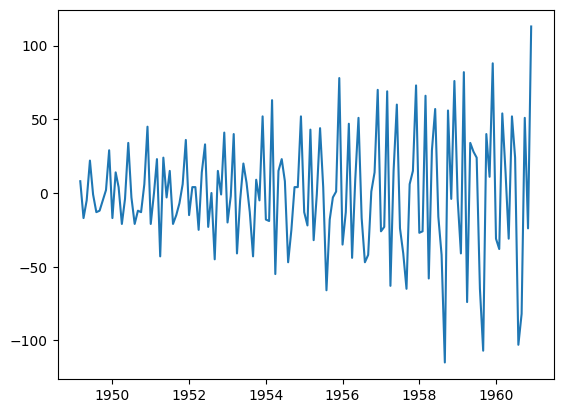

In [ ]:
plt.plot(df)

In [ ]:
#p,d=2,q


In [ ]:
#seasonal decompose method:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df

,#Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [ ]:
decompose=seasonal_decompose(df['#Passengers'],model='additive')

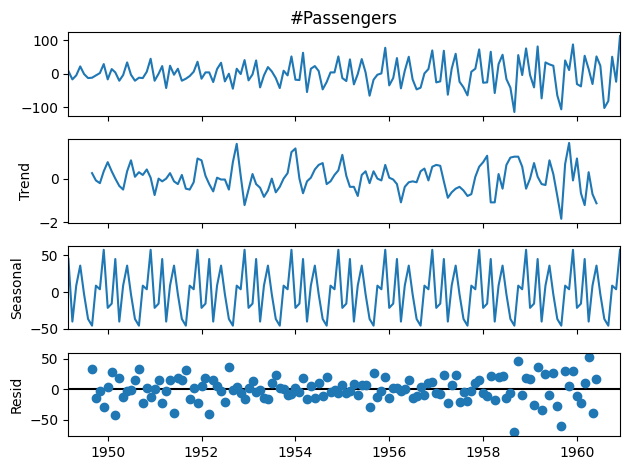

In [ ]:
decompose.plot()
plt.show()

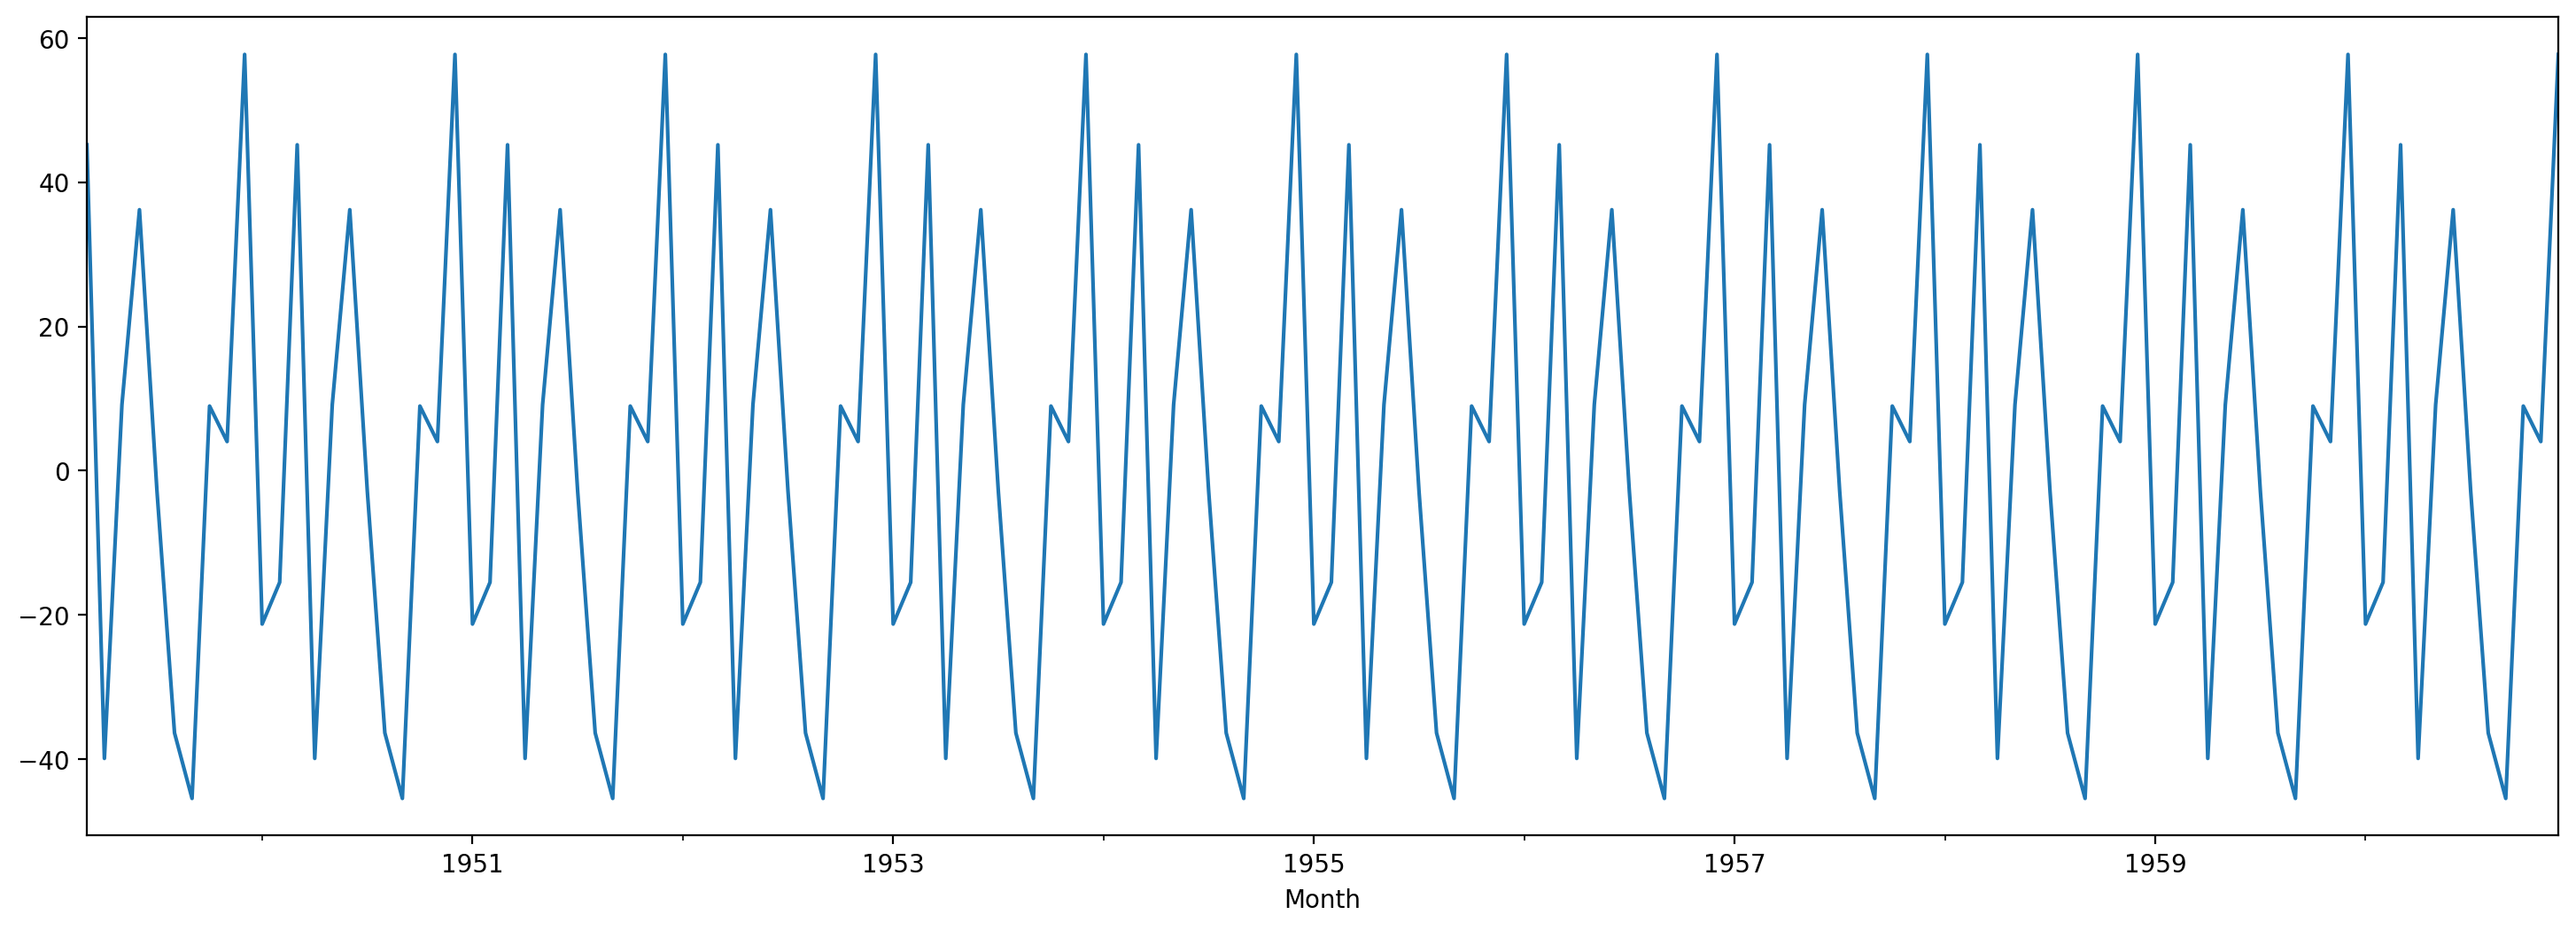

In [ ]:

d_seasonal=decompose.seasonal
plt.figure(figsize=(18,6),dpi=200)
d_seasonal.plot()
plt.show()
#seasonality,s=12

In [ ]:
#p,d=2,q
#acf(q),pacf(p) plots
#itertools
#auto arima

In [ ]:
#acf(q),pacf(p) plots
#Acf-autocorrelation function(acf)(q)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#if pacf, acf cuts off after a few lags- possible AR(p), MA(q) respectively
#if lags are decreasing slowly, not stationary, need differcing

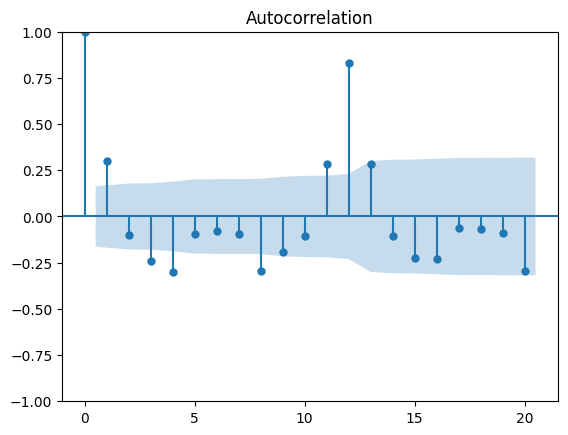

In [ ]:
plot_acf(df['#Passengers'].diff().dropna(),lags=20)
plt.show()

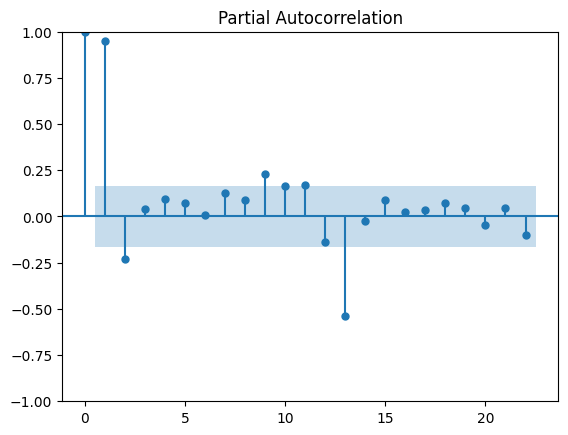

In [ ]:
plot_pacf(df['#Passengers'])
plt.show()

In [ ]:
#auto arima
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima
!pip install numpy==1.26.3

from pmdarima import auto_arima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
model=auto_arima(df,seasonal=True,m=12)

In [ ]:
model.order#(p,d,q)

In [ ]:
model.seasonal_order#(P,D,Q,S)

In [ ]:
#p=2,d=2,q=2, S=12

In [ ]:
df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [ ]:
train=df.iloc[:100]#0,1,2..99
test=df.iloc[100:]#100,,...143

In [ ]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-12-01,306
1957-01-01,315
1957-02-01,301


In [ ]:
test

,#Passengers
Month,
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#order=(p,d,q)
arima_model=ARIMA(train,order=(2,2,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
arima_model = arima_model.fit()

In [ ]:
#start label=len(train)
len(train)
#100
len(train)+len(test)-1
#100+44
#144-1
#143

143

In [ ]:
df['arima_prediction']=arima_model.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
df

,#Passengers,arima_prediction
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,432.614135
1960-09-01,508,434.941455
1960-10-01,461,437.268775


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Month'>

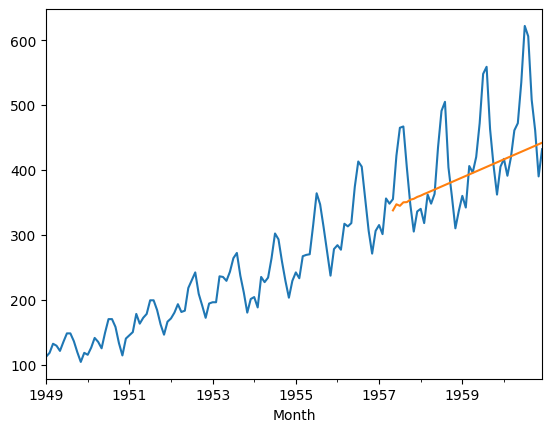

In [ ]:
df['#Passengers'].plot()
df['arima_prediction'].plot()

In [ ]:

forecast=arima_model.forecast(steps=36)
forecast

,predicted_mean
1957-05-01,337.617503
1957-06-01,347.035021
1957-07-01,344.634082
1957-08-01,350.056563
1957-09-01,350.354124
1957-10-01,354.012296
1957-11-01,355.467002
1957-12-01,358.366478
1958-01-01,360.318646
1958-02-01,362.891946


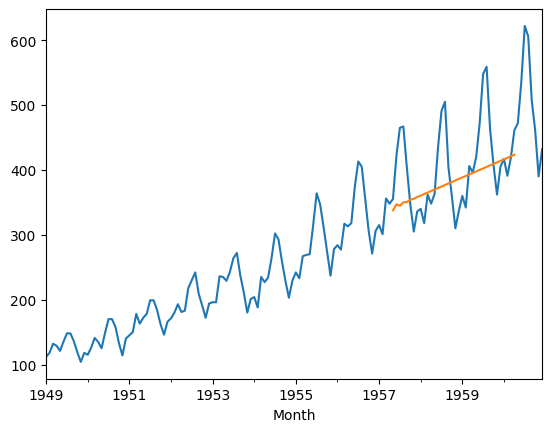

In [ ]:
df['#Passengers'].plot()
forecast.plot()
plt.show()

In [ ]:
#sarima
#order->(p,d,q)
#seasonal_order->(P,D,Q,S)


In [ ]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-12-01,306
1957-01-01,315
1957-02-01,301


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#df['weather']

In [ ]:
s_model=SARIMAX(train,order=(2,2,2),seasonal_order=(2,2,2,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
#training
s_model=s_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#testing
s_prediction=s_model.predict(start=len(train),end=len(train)+len(test)-1)
s_prediction

,predicted_mean
1957-05-01,356.367317
1957-06-01,412.913534
1957-07-01,459.471927
1957-08-01,447.627360
1957-09-01,394.619103
1957-10-01,345.145350
1957-11-01,305.806612
1957-12-01,344.966958
1958-01-01,355.110043
1958-02-01,338.586515


In [ ]:
df.drop('arima_prediction',axis=1,inplace=True)


<Axes: xlabel='Month'>

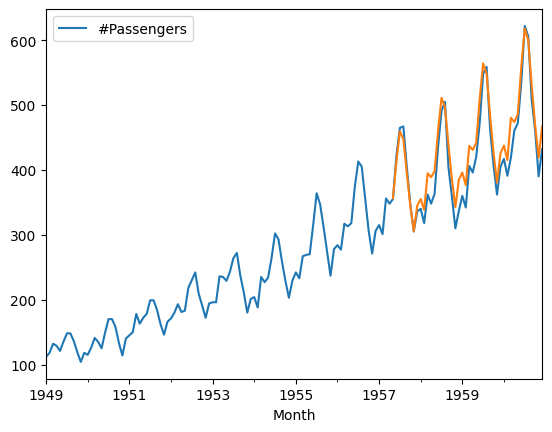

In [ ]:
df.plot()
s_prediction.plot()

In [ ]:
from sklearn.metrics import *

In [ ]:
test

,#Passengers
Month,
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [ ]:
#RMSE
import numpy as np
np.sqrt(mean_squared_error(test['#Passengers'],s_prediction))

np.float64(25.470650973404908)

In [ ]:
s_forecast=s_model.forecast(steps=48)

In [ ]:
s_forecast

,predicted_mean
1957-05-01,356.367317
1957-06-01,412.913534
1957-07-01,459.471927
1957-08-01,447.627360
1957-09-01,394.619103
1957-10-01,345.145350
1957-11-01,305.806612
1957-12-01,344.966958
1958-01-01,355.110043
1958-02-01,338.586515


<Axes: xlabel='Month'>

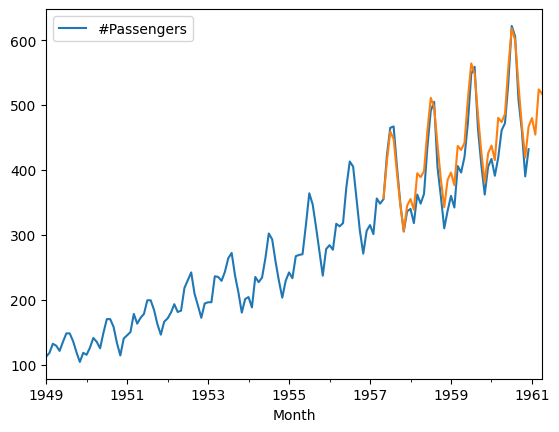

In [ ]:
df.plot()
s_forecast.plot()

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
s_model=SARIMAX(df,order=(2,2,2),seasonal_order=(2,2,2,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
s_model=s_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
s_forecasting=s_model.forecast(steps=36)

<Axes: xlabel='Month'>

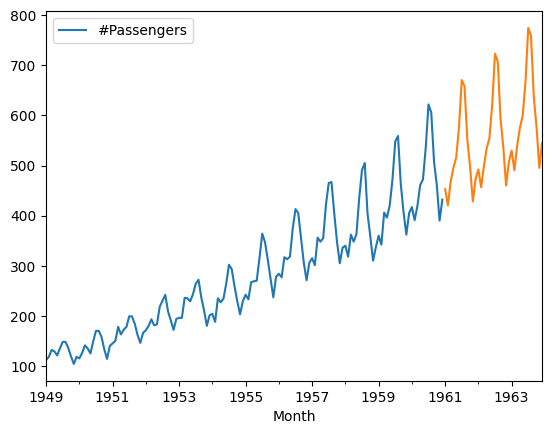

In [ ]:
df.plot()
s_forecasting.plot()

In [ ]:
col1 col2 col3 col4
x- exogenous variables

x_new=(x-mean)/std
#prediction
(x_pred*std)+mean=x_pred_actual

mean,std-> x_new

In [ ]:
df=df.reset_index()
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
df['Month'].dt.day_of_week

,Month
0,5
1,1
2,1
3,4
4,6
...,...
139,0
140,3
141,5
142,1


In [ ]:
https://colab.research.google.com/drive/1lhzyTBbkRMqQ_iVT8GBxMe--fW4B2gon?usp=sharing